## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2021.

# ECBM E4040 - Assignment 2 - Task 4: Data Augmentation & Transfer Learning 

Important factors in neural network training include the size and quality of the training set. Since it is often not possible to get a clean and large enough dataset for training, one way to improve the network's robustness and generalization ability is to create 'fake' data by injecting random noise or to perform transformations on the available data. A technique which implements this strategy is called __data augmentation__ and has shown to be very effective.

One thing to remember when you augment your data is to never change the correct label of a sample. For example, for hand-written digit dataset, flipping a letter 'b' ends up looking like a letter 'd', but you must keep the label for 'b'. So please choose the best augmentation methods for your dataset.

In the last part of this task, we introduce __transfer learning__ in TensorFlow to you by showing a demo. Test time augmentation (TTA) as additional content in data augmentation is also introduced based on your experiences on previous parts.

**Note:** you will need to download the data for task 4, located in the liondrive [here](https://drive.google.com/drive/folders/1SLLr3sEiZCmldrhX46f9_Nhkd-7PmV_t). You should have two .csv files in the folder '__data__': '__sign_mnist_test.csv__' and '__sign_mnist_train.csv__'.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import numpy as np
import os

try:
    import pandas as pd
    
except ModuleNotFoundError:
    os.system('pip install pandas')
    import pandas as pd
    
import matplotlib.pyplot as plt
import tensorflow as tf

## Load Data

For this task we will be using the Sign Language MNIST dataset. Examples are comprised of 28 x 28 greyscale images representing sign language letters. Note that while most sign letter are static symbols, the signs for J (9) and Z (25) include motions and are thus not included in this dataset.


![image](https://s-media-cache-ak0.pinimg.com/564x/f9/68/ee/f968eece212b201510fd617c9cb70269.jpg)

In [2]:
# Load the Sign Language MNIST data.
img_cols = 28
img_rows = 28

#Import data from csv using pandas DataFrame
X_train = pd.read_csv("./data/sign_mnist_train.csv")
X_test = pd.read_csv("./data/sign_mnist_test.csv")

#Convert X_train,X_test from DataFrame to an array
X_train = X_train.values
X_test = X_test.values

#First column of X_train is y_train, first column of X_test is y_test
y_train = X_train[:,0]
y_test = X_test[:,0]

#Remove first column from X_train, X_test
X_train = X_train[:,1:]
X_test = X_test[:,1:]

# Data organizations:
# Train data: 27455 samples from original train set: 1~27455
# Validation data: 1000 samples from original train set: 26455~27455
# Test data: 7172 samples
# We've vectorized the 

X_train = X_train.reshape(27455, -1)
X_test = X_test.reshape(7172,-1)

num_train = 26455
num_validation = 1000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]
# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

print("Number of classes: {}".format(len(set(y_train))))

(26455, 784) (1000, 784) (7172, 784) (128, 784)
Number of classes: 24


## Part 1: Visualization

### Visualize some original images

Here we use Pyplot to draw any 16 samples from the __development set__ in a 4-by-4 grid.

__Note__: Since we have vectorized our data, we need to reshape it into 28 x 28 greyscale images.

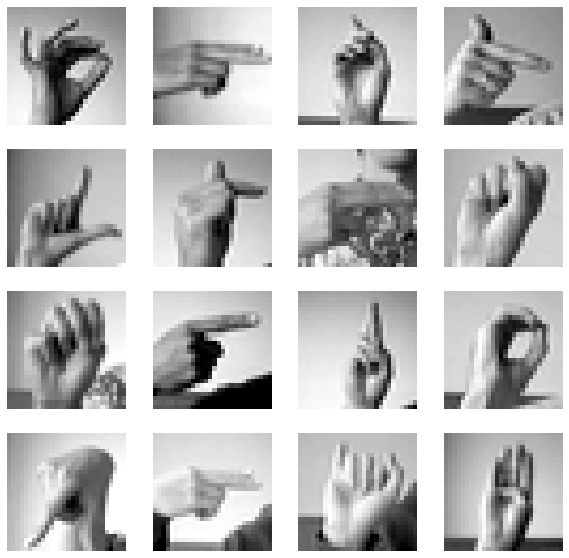

In [3]:
# Visualization of the original data.

fig = plt.figure(figsize=(10, 10))

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    ax.imshow(X_dev[i, :].reshape(28, 28), 'gray')
    ax.axis('off')

## Part 2: Automatic Batch Generator

We want you to create an automatic image generator that does several kinds of data augmentations, and produces a batch of data consisting of random samples every time you call it. 

<span style="color:red">__TODO__:</span> Finish the functions of class __ImageGenerator__ in **utils/image_generator.py**. The code is fully commented with instructions.

__Hint__: The python keywords __yield__ and __next__ can help you do some tricks.

In [4]:
from utils.image_generator import ImageGenerator

Create an ImageGenerator object using the __development set__, and use __show__ function to plot the top 16 original images.

__Note__: We need to reshape your data as the demanding input format of the class __ImageGenerator__.

In [5]:
print(X_dev.shape)
print(X_dev.reshape(-1,1,28,28).transpose(0,2,3,1).shape)

(128, 784)
(128, 28, 28, 1)


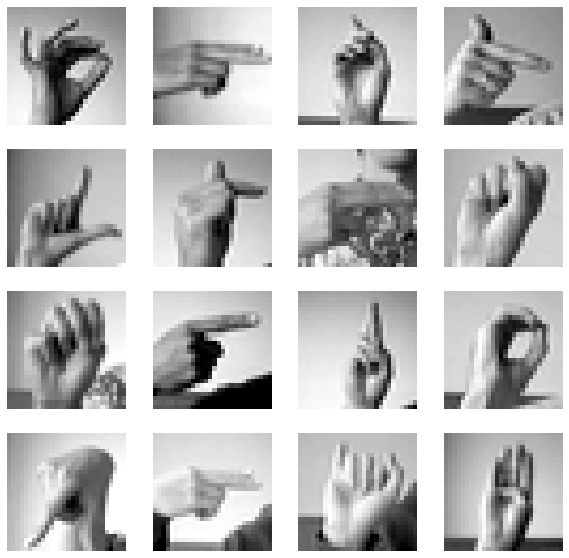

In [6]:
gen = ImageGenerator(X_dev.reshape(-1,1,28,28).transpose(0,2,3,1), y_dev)
gen.show(X_dev)

### Increase Brightness (demo)

Increase the brightness of the original __development set__, and plot 16 images with noise added.(These images may not be the same as the above 16 images according to your choice of parameters.)

Brightness increased by a factor of: 1.5


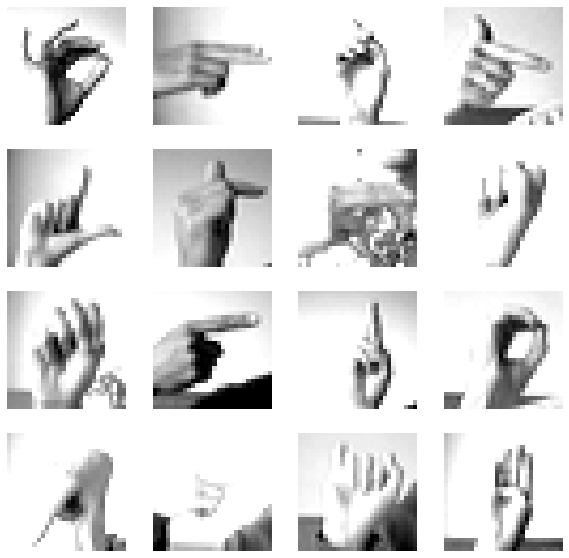

In [7]:
bright = gen.brightness(1.5)
gen.show(bright)

### Horizontal and Verical Flip (demo)

Flip the original __development set__ as you like (horizontal, vertical, or both), and plot the top 16 images.

Vertical flip:  True Horizontal flip:  False


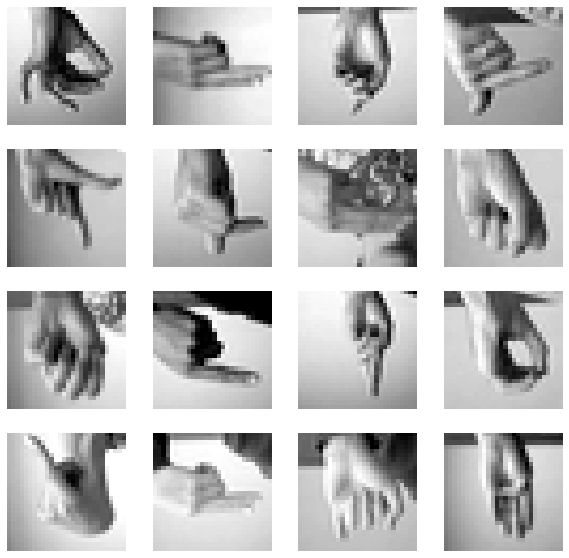

In [8]:
flipped = gen.flip('v')
gen.show(flipped)

### Translation

<span style="color:red">__TODO:__</span> Implement the funciton **translate()** in **utils/image_generator.py**. Shift the original __development set__ by several pixels in both directions, and plot the top 16 images.

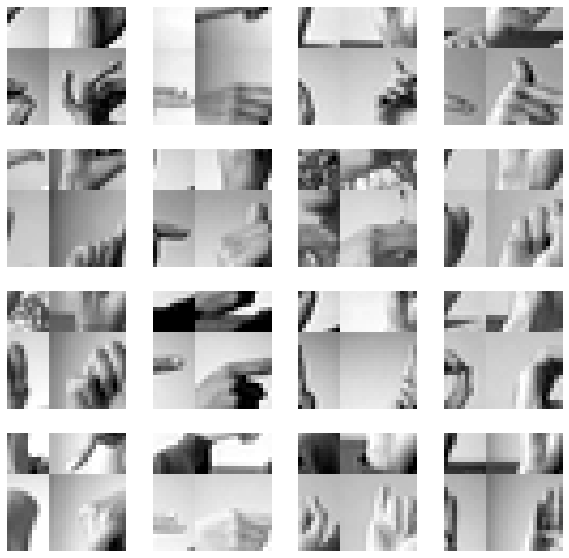

In [9]:
### TODO: Your code here ###
translated = gen.translate(10,10)
gen.show(translated)

### Rotation

<span style="color:red">__TODO:__</span> Implement the function **rotate()** in **utils.image_generator.py**. Rotate the original __development set__ by several degrees and plot the top 16 images.### TODO: Your code here ###

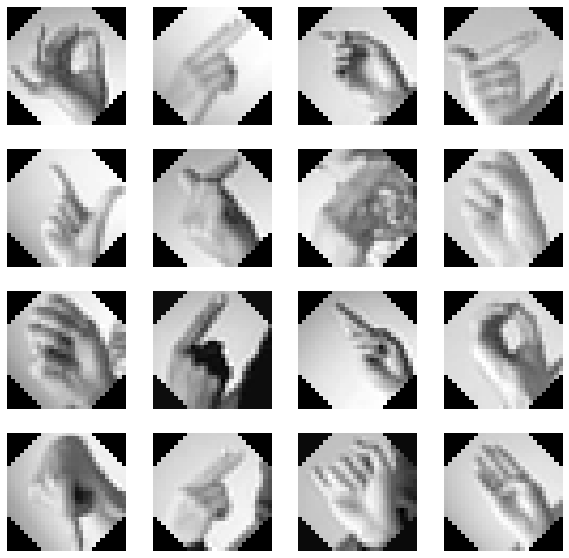

In [10]:
### TODO: Your code here ###
rotated = gen.rotate(45)
gen.show(rotated)

### Add Noise

<span style="color:red">__TODO:__</span> Implement the function **add_noise()** in **utils.image_generator.py**. Inject random noise into the original __development set__, and plot 16 images with noise added. (These images may not be the same as the above 16 images according to your choice of parameters.)

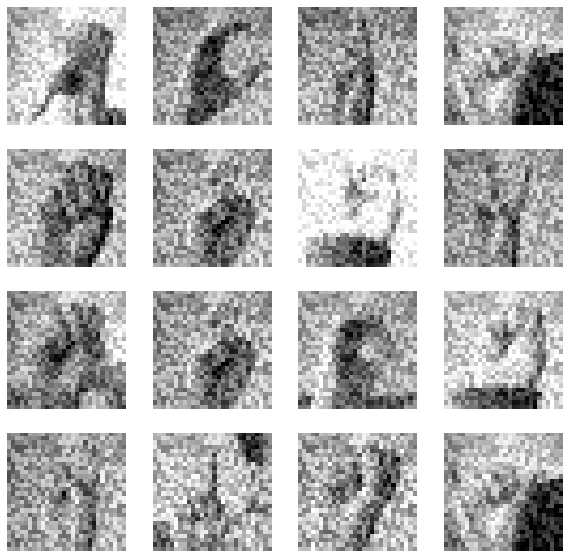

In [11]:
### TODO: Your code here ###
added = gen.add_noise(0.5, 100)
gen.show(added)

## Part 3: Data Augmentation + LeNet

<span style="color:red">__TODO__:</span> Now you have your own data generator. You have been provided a simplified LeNet model in __utils/neuralnets/cnn/model_LeNet.py__. In __utils/neuralnets/cnn/my_LeNet_trainer.py__ you will find two TODOs. 

The first TODO asks you to **prepare batches of augmented training data** using the ImageGenerator you completed in the previous section. When generating augmented data, it is important to think carefully about the changes you are making to the data and the effect those changes may have on their classification. For example, the sign for the letter G is as follows:

![im](https://media.istockphoto.com/vectors/is-the-seventh-letter-of-the-alphabet-in-sign-language-vector-image-vector-id1209943258?k=6&m=1209943258&s=612x612&w=0&h=46JNhmLyb9qHjNiI7TGC9xKo7icHf7GEW6NA2Z25c6A=)

Similarly, the sign for Q is 

![im2](https://data.formsbank.com/pdf_docs_html/35/354/35435/page_1_thumb_big.png).

<span style="color:red">__TODO__:</span> Before completing the TODOs in __utils/neuralnets/cnn/my_LeNet_trainer.py__, explain which augmentations, or combination of augmentations (brightness, horizontal flip, vertical flip, translation, rotation, noise, etc.) could create issues for the classifier in the context of the signs for G and Q. Are there any other augmentations of signs that could pose problems?

<span style="color:red">__Your answer here__:</span>

For characters e, m, n, s, t, the sign of them are very similar as a fist. The classifier needs to recognize the details of those different fists. However, add_noise() function can make the details vague, it's difficult for classifier to tell the difference between those signs with heavey noise.

<span style="color:red">__TODO__:</span> Propose a series of augmentations (at least 4) from the functions we implemented to generate an augmented training set. Be sure to avoid the issues discussed above and include argument parameters for the augmentation functions.

Ex:

1. flip('v')
2. brightness(1.5)
3. etc.

<span style="color:red">__Your answer here__:</span>

1. flip('h')
2. britness(1.2)
3. translate(3,5)
4. rotate(20)
5. add_noise(0.8,10)

<span style="color:red">__TODO__:</span> Complete the function **batch_train_data()** in **utils/neuralnets/cnn/my_LeNet_trainer.py** with your proposed data augmnetations.

<span style="color:red">__TODO__:</span> Complete the function **train_epoch()** in **utils/neuralnets/cnn/my_LeNet_trainer.py**.

__Install tqdm__: tqdm is a fast, extensible progress meter.

In [12]:
!pip install tqdm

You should consider upgrading via the '/home/ecbm4040/envTF24/bin/python3 -m pip install --upgrade pip' command.


In [13]:
X_t = X_train.reshape(-1,1,28,28).transpose(0,2,3,1)
X_v = X_val.reshape(-1,1,28,28).transpose(0,2,3,1)

print(X_t.shape)
print(X_v.shape)

(26455, 28, 28, 1)
(1000, 28, 28, 1)


In [14]:
from utils.neuralnets.cnn.my_LeNet_trainer import MyLeNet_trainer

<span style="color:red">__TODO__:</span> train network using run method in MyLeNet_trainer

In [15]:
# YOUR CODE HERE
My_LNT = MyLeNet_trainer(X_t, y_train, X_v, y_val, epochs=10, batch_size=256, lr=1e-3)
My_LNT.run()

Vertical flip:  False Horizontal flip:  True
Brightness increased by a factor of: 1.2
Training Epoch 1


/home/ecbm4040/envTF24/lib/python3.6/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Loss: 0.4335898160934448, Accuracy: 90.48572540283203, Test Loss: 0.02736719138920307, Test Accuracy: 100.0
Training Epoch 2
Loss: 0.013503598980605602, Accuracy: 100.0, Test Loss: 0.0072770253755152225, Test Accuracy: 100.0
Training Epoch 3
Loss: 0.004423928447067738, Accuracy: 100.0, Test Loss: 0.003122940193861723, Test Accuracy: 100.0
Training Epoch 4
Loss: 0.002130580600351095, Accuracy: 100.0, Test Loss: 0.0031175795011222363, Test Accuracy: 100.0
Training Epoch 5
Loss: 0.0011445911368355155, Accuracy: 100.0, Test Loss: 0.0009316553478129208, Test Accuracy: 100.0
Training Epoch 6
Loss: 0.0006461492157541215, Accuracy: 100.0, Test Loss: 0.0005615571863017976, Test Accuracy: 100.0
Training Epoch 7
Loss: 0.0003977389133069664, Accuracy: 100.0, Test Loss: 0.00033708446426317096, Test Accuracy: 100.0
Training Epoch 8
Loss: 0.0002471785992383957, Accuracy: 100.0, Test Loss: 0.00021939209545962512, Test Accuracy: 100.0
Training Epoch 9
Loss: 0.00015531379904132336, Accuracy: 100.0, Test

### TODO: add describe training process

**Firstly we define how the data is going to be augmented, then invoke the Image_generator function to implement augmentation to the dataset also concatenate the augmented data with the oringinal data. Then, in the training process, we transform the augmented dataset to iterable, constantly use it in the training iteration.**

## Part 4 (demos): Transfer Learning and Test Time Augmentation (TTA)

This is the last part of assignment 2 before we go to the kaggle competition. In this part, we will provide you with examples of transfer learning, as well as the last context of data augmentation: test time augmentation. We believe they are useful tools for task 5.

__Note__: The network in demos is not guaranteed to be well-trained. __No points are set in this part__. Feel free to edit the scripts and tune the parameters by yourselves.

### Transfer Learning

The intuition behind transfer learning is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. For a somewhat different problem, you can then take advantage of these learned feature maps without having to start from scratch and training a new large model on a large dataset.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. Generally, we have two ways to customize a pre-trained model:

1. **Feature Extraction**: Use the representations learned by a previous network to extract meaningful features from new samples. You simply add a new classifier, which will be trained from scratch, on top of the pretrained model so that you can repurpose the feature maps learned previously for our dataset. However, the final, classification part of the pretrained model is specific to original classification task, and subsequently specific to the set of classes on which the model was trained. That means you do not need to (re)train the entire model. You "freeze" the base convolution network, and only train the newly added classifier layers. 

2. **Fine-Tuning**: Unfreezing a few of the top layers of a frozen model base and jointly training both the newly-added classifier layers and the last layers of the base model. This allows us to "fine tune" the higher-order feature representations in the base model in order to make them more relevant for the specific task.

This example uses the base model from __MobileNet__ for a transfer learning of a 10-class classification task on CIFAR-10 dataset. The whole pipeline will include:

1. Load data
2. Build an input pipeline, in this case using Keras ImageDataGenerator
3. Compose our model
4. Load in our pretrained base model (and pretrained weights)
5. Stack our classification layers on top
6. Train our model
7. Evaluate model

Other references: https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from utils.cifar_utils import load_data

In [6]:
# Load the raw CIFAR-10 data.
X_train, y_train = load_data(mode='train')

# Data organizations:
# Train data: 49000 samples from original train set: 1~49000
# Validation data: 1000 samples from original train set: 49000~50000
num_training = 49000
num_validation = 1000

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image

X_train = X_train.reshape(-1,3,32,32).transpose(0,2,3,1) / 255
X_val = X_val.reshape(-1,3,32,32).transpose(0,2,3,1) / 255

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

y_train_dummy = tf.keras.utils.to_categorical(y_train)
y_val_dummy = tf.keras.utils.to_categorical(y_val)
print('Train labels shape (one-hot): ', y_train_dummy.shape)
print('Validation labels shape (one-hot): ', y_val_dummy.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Train labels shape (one-hot):  (49000, 10)
Validation labels shape (one-hot):  (1000, 10)


In [7]:
#imports the mobilenet model and discards the last 1000 neuron layer.
base_model=MobileNet(weights='imagenet',include_top=False) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

In [8]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [9]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [10]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 32)    0     

In [11]:
bs = 98 #batch size
epc = 25 #number of epoches
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_generator = train_datagen.flow(X_train, y_train_dummy, batch_size=bs)
step_size_train=train_generator.n//train_generator.batch_size

In [12]:
# train the model
history = model.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=(X_val, y_val_dummy))

/home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
500/500 [==============================] - 27s 20ms/step - loss: 1.9067 - accuracy: 0.3227 - val_loss: 2.7344 - val_accuracy: 0.1560
Epoch 2/25
500/500 [==============================] - 10s 19ms/step - loss: 1.4263 - accuracy: 0.4926 - val_loss: 2.9407 - val_accuracy: 0.1490
Epoch 3/25
500/500 [==============================] - 9s 18ms/step - loss: 1.3154 - accuracy: 0.5387 - val_loss: 3.3190 - val_accuracy: 0.1760
Epoch 4/25
500/500 [==============================] - 9s 18ms/step - loss: 1.2518 - accuracy: 0.5589 - val_loss: 3.2293 - val_accuracy: 0.1670
Epoch 5/25
500/500 [==============================] - 9s 19ms/step - loss: 1.2165 - accuracy: 0.5718 - val_loss: 3.0733 - val_accuracy: 0.1510
Epoch 6/25
500/500 [==============================] - 9s 18ms/step - loss: 1.1858 - accuracy: 0.5805 - val_loss: 3.3648 - val_accuracy: 0.1640
Epoch 7/25
500/500 [==============================] - 9s 18ms/step - loss: 1.1838 - accuracy: 0.5758 - val_loss: 3.6008 - val_accuracy: 0.14

In [13]:
print(f'Baseline accuracy: {model.evaluate(X_val, y_val_dummy)[1]}')

32/32 [==============================] - 0s 5ms/step - loss: 6.4050 - accuracy: 0.1240
Baseline accuracy: 0.12399999797344208


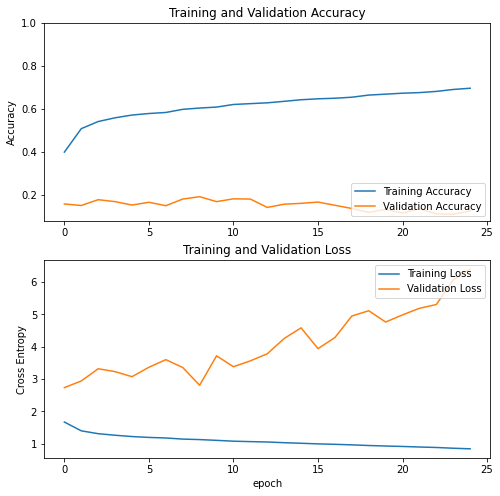

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Test Time Augmentation (TTA)

Key references: 

https://towardsdatascience.com/test-time-augmentation-tta-and-how-to-perform-it-with-keras-4ac19b67fb4d

https://machinelearningmastery.com/how-to-use-test-time-augmentation-to-improve-model-performance-for-image-classification/


Data Augmentation is the process of randomly applying some operations (rotation, zoom, shift, flips,…) to the input data. By this mean, the model can learn more general features about the classes it has to recognize.

However, there also exists some ways to improve the results of the model by changing the way we test it. That is Test Time Augmentation (TTA).

TTA is now a commonly used technique in kaggle competition on classification. Similar to what data augmentation is doing to the training set, TTA is to perform similar data modifications to the test images. Thus, instead of showing the regular, “clean” images, only once to the trained model, we will show it the augmented images several times. The final guess of each corresponding image will base on the average of the prediction results.

The reason why we refer to TTA is that, by averaging our predictions, on randomly modified images, we are also averaging the errors. The error can be big in a single vector, leading to a wrong answer, but when averaged, only the correct answer stand out. TTA is particularly useful for test images that the model is pretty unsure. The following example will show you how to apply TTA with Keras.


In [17]:
# call an ImageDataGenerator similar to training set for test set.
test_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=10.,
        fill_mode='reflect', 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

In [18]:
from tqdm import tqdm

# test time augmentation, we set TTA for 10 times averaging.
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict(test_datagen.flow(X_val, batch_size=bs, shuffle=False), steps = len(X_val)/bs)
    predictions.append(preds)

100%|██████████| 10/10 [00:05<00:00,  1.75it/s]


In [19]:
# print final prediction results
final_pred = np.mean(predictions, axis=0)
print(f'Accuracy with TTA: {np.mean(np.equal(np.argmax(y_val_dummy, axis=-1), np.argmax(final_pred, axis=-1)))}')

Accuracy with TTA: 0.099
